In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
requests.__path__

['/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

In [3]:
url = "https://www.pro-football-reference.com/"
response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
page = response.text

In [6]:
nfl_soup = BeautifulSoup(page, "html")
#print(nfl_soup.prettify())
#print(nfl_soup)

In [7]:
len(nfl_soup.find_all('a'))

478

In [8]:
nfl_teams_set = set(link["href"] for link in nfl_soup.find_all('a') if "teams" in str(link))

#remove dups
nfl_teams_list = list(nfl_teams_set)
nfl_teams_list[:10]


['/teams/det/2018.htm',
 '/teams/mia/2018.htm',
 '/teams/ram/2019.htm',
 '/teams/car/2019.htm',
 '/teams/jax/2018.htm',
 '/teams/oti/2019.htm',
 '/teams/nyg/2019.htm',
 '/teams/chi/2018.htm',
 '/teams/pit/2018.htm',
 '/teams/rai/2018.htm']

In [9]:
nfl_team_links = []
for ele in nfl_teams_list:
    if ele[-5] == '8':
        nfl_team_links.append(ele)
        #nfl_teams_list.remove(ele)
nfl_team_links

['/teams/det/2018.htm',
 '/teams/mia/2018.htm',
 '/teams/jax/2018.htm',
 '/teams/chi/2018.htm',
 '/teams/pit/2018.htm',
 '/teams/rai/2018.htm',
 '/teams/was/2018.htm',
 '/teams/den/2018.htm',
 '/teams/dal/2018.htm',
 '/teams/nor/2018.htm',
 '/teams/min/2018.htm',
 '/teams/nwe/2018.htm',
 '/teams/phi/2018.htm',
 '/teams/atl/2018.htm',
 '/teams/car/2018.htm',
 '/teams/cin/2018.htm',
 '/teams/sea/2018.htm',
 '/teams/buf/2018.htm',
 '/teams/sdg/2018.htm',
 '/teams/htx/2018.htm',
 '/teams/crd/2018.htm',
 '/teams/kan/2018.htm',
 '/teams/gnb/2018.htm',
 '/teams/nyg/2018.htm',
 '/teams/clt/2018.htm',
 '/teams/sfo/2018.htm',
 '/teams/tam/2018.htm',
 '/teams/nyj/2018.htm',
 '/teams/ram/2018.htm',
 '/teams/oti/2018.htm',
 '/teams/cle/2018.htm',
 '/teams/rav/2018.htm']

In [10]:
print(nfl_team_links)

['/teams/det/2018.htm', '/teams/mia/2018.htm', '/teams/jax/2018.htm', '/teams/chi/2018.htm', '/teams/pit/2018.htm', '/teams/rai/2018.htm', '/teams/was/2018.htm', '/teams/den/2018.htm', '/teams/dal/2018.htm', '/teams/nor/2018.htm', '/teams/min/2018.htm', '/teams/nwe/2018.htm', '/teams/phi/2018.htm', '/teams/atl/2018.htm', '/teams/car/2018.htm', '/teams/cin/2018.htm', '/teams/sea/2018.htm', '/teams/buf/2018.htm', '/teams/sdg/2018.htm', '/teams/htx/2018.htm', '/teams/crd/2018.htm', '/teams/kan/2018.htm', '/teams/gnb/2018.htm', '/teams/nyg/2018.htm', '/teams/clt/2018.htm', '/teams/sfo/2018.htm', '/teams/tam/2018.htm', '/teams/nyj/2018.htm', '/teams/ram/2018.htm', '/teams/oti/2018.htm', '/teams/cle/2018.htm', '/teams/rav/2018.htm']


In [11]:
len(nfl_team_links)

32

In [12]:
for idx, second_half_url in enumerate(nfl_team_links):
    nfl_team_links[idx] = "https://www.pro-football-reference.com" + second_half_url
nfl_team_links

['https://www.pro-football-reference.com/teams/det/2018.htm',
 'https://www.pro-football-reference.com/teams/mia/2018.htm',
 'https://www.pro-football-reference.com/teams/jax/2018.htm',
 'https://www.pro-football-reference.com/teams/chi/2018.htm',
 'https://www.pro-football-reference.com/teams/pit/2018.htm',
 'https://www.pro-football-reference.com/teams/rai/2018.htm',
 'https://www.pro-football-reference.com/teams/was/2018.htm',
 'https://www.pro-football-reference.com/teams/den/2018.htm',
 'https://www.pro-football-reference.com/teams/dal/2018.htm',
 'https://www.pro-football-reference.com/teams/nor/2018.htm',
 'https://www.pro-football-reference.com/teams/min/2018.htm',
 'https://www.pro-football-reference.com/teams/nwe/2018.htm',
 'https://www.pro-football-reference.com/teams/phi/2018.htm',
 'https://www.pro-football-reference.com/teams/atl/2018.htm',
 'https://www.pro-football-reference.com/teams/car/2018.htm',
 'https://www.pro-football-reference.com/teams/cin/2018.htm',
 'https:

In [13]:
print(nfl_team_links[0], type(nfl_team_links[0]))

https://www.pro-football-reference.com/teams/det/2018.htm <class 'str'>


In [14]:
url = 'https://www.pro-football-reference.com/teams/sdg/2018.htm'
response = requests.get(url)
response.status_code

200

In [15]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import chromedriver_binary

## Let's get a few years of data

In [16]:
def year(digit):
    new_year_links = []
    for link in nfl_team_links:
        new_year_links.append(link.replace('8', digit))
    return(new_year_links)
    

In [17]:
nfl_team_links=nfl_team_links+year('7')+year('6')+year('5')
nfl_team_links

['https://www.pro-football-reference.com/teams/det/2018.htm',
 'https://www.pro-football-reference.com/teams/mia/2018.htm',
 'https://www.pro-football-reference.com/teams/jax/2018.htm',
 'https://www.pro-football-reference.com/teams/chi/2018.htm',
 'https://www.pro-football-reference.com/teams/pit/2018.htm',
 'https://www.pro-football-reference.com/teams/rai/2018.htm',
 'https://www.pro-football-reference.com/teams/was/2018.htm',
 'https://www.pro-football-reference.com/teams/den/2018.htm',
 'https://www.pro-football-reference.com/teams/dal/2018.htm',
 'https://www.pro-football-reference.com/teams/nor/2018.htm',
 'https://www.pro-football-reference.com/teams/min/2018.htm',
 'https://www.pro-football-reference.com/teams/nwe/2018.htm',
 'https://www.pro-football-reference.com/teams/phi/2018.htm',
 'https://www.pro-football-reference.com/teams/atl/2018.htm',
 'https://www.pro-football-reference.com/teams/car/2018.htm',
 'https://www.pro-football-reference.com/teams/cin/2018.htm',
 'https:

In [18]:
pass
    

## Try Selenium with just the Chargers

In [19]:
driver = webdriver.Chrome()
driver.get(url)

In [20]:
soup_selenium = BeautifulSoup(driver.page_source)

In [21]:
chargers_df = pd.read_html(str(soup_selenium.find(id='rushing_and_receiving')))[0]
chargers_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                 No.             Player                Age                Pos   
0               28.0     Melvin Gordon*               25.0                 RB   
1               30.0      Austin Ekeler               23.0                 rb   
2               32.0     Justin Jackson               23.0                 rb   
3               17.0     Philip Rivers*               37.0                 QB   
4               38.0     Detrez Newsome               24.0                NaN   

  Games       Rushing                 ... Receiving                           \
      G    GS     Att  Yds  TD   Lng  ...       Lng  R/G   Y/G   Ctch% Y/Tgt   
0    12  12.0     175  885  10  34.0  ...      66.0  4.2  40.8   75.8%   7.4   
1    14   3.0     106  554   3  41.0  ...      44.0  2.8  28.9   73.6%   7.6   
2    13   1.0      50  206   2  20.0  ...      19.0  1.2  10.4   78.9%   7.1   
3    16  16.0      18    7   0   7.0  ...       NaN  NaN   NaN     NaN   NaN   
4     9   0.0      11   49   0  16.0  ...      11.0  0.2   2.1  100.0%   9.5   

  Total Yds             Unnamed: 26_level_0 Unnamed: 27_level_0  
      Touch Y/Tch  YScm                RRTD                 Fmb  
0     225.0   6.1  1375                  14                   1  
1     145.0   6.6   958                   6                   1  
2      65.0   5.2   341                   2                   0  
3      18.0   0.4     7                   0                   2  
4      13.0   5.2    68                   0                   0  

[5 rows x 28 columns]

In [22]:
driver.quit()

In [23]:
chargers_df.columns = ['No','Player','Age','Pos','G','GS','Att','Rush_Yds','Rush_TD','Lng_Rush',
                       'Y/A','Rush_Y/G','A/G','Tgt','Rec','Rec_Yds','Y/R','Rec_TD','Lng_Rec','R/G',
                       'Rec_Y/G','Ctch%','Y/Tgt','Touch','Y/Tch','YScm','RRTD','Fmb']
chargers_df

No           Player   Age     Pos   G    GS  Att  Rush_Yds  Rush_TD  \
0   28.0   Melvin Gordon*  25.0      RB  12  12.0  175       885       10   
1   30.0    Austin Ekeler  23.0      rb  14   3.0  106       554        3   
2   32.0   Justin Jackson  23.0      rb  13   1.0   50       206        2   
3   17.0   Philip Rivers*  37.0      QB  16  16.0   18         7        0   
4   38.0   Detrez Newsome  24.0     NaN   9   0.0   11        49        0   
5   13.0    Keenan Allen*  26.0      WR  16  14.0    9        75        0   
6    3.0       Geno Smith  28.0     NaN   5   0.0    8         2        0   
7   81.0    Mike Williams  24.0      wr  16   5.0    7        28        1   
8   12.0  Travis Benjamin  29.0      wr  12   3.0    7        41        0   
9   34.0       Derek Watt  26.0      fb  16   5.0    4        11        0   
10  16.0  Tyrell Williams  26.0  lcb/wr  16  10.0    2        15        0   
11  54.0   Melvin Ingram*  29.0      DE  16  16.0    1         0        0   
12  89.0         JJ Jones  26.0     NaN   3   0.0    1         0        0   
13  85.0    Antonio Gates  38.0      te  16   1.0    0         0        0   
14  88.0     Virgil Green  30.0      TE  16  16.0    0         0        0   
15  80.0      Sean Culkin  25.0      TE  13  10.0    0         0        0   
16   NaN       Team Total  26.2     NaN  16   NaN  399      1873       16   
17   NaN        Opp Total   NaN     NaN  16   NaN  395      1693       11   

    Lng_Rush  ...  Lng_Rec   R/G  Rec_Y/G   Ctch%  Y/Tgt  Touch  Y/Tch  YScm  \
0       34.0  ...     66.0   4.2     40.8   75.8%    7.4  225.0    6.1  1375   
1       41.0  ...     44.0   2.8     28.9   73.6%    7.6  145.0    6.6   958   
2       20.0  ...     19.0   1.2     10.4   78.9%    7.1   65.0    5.2   341   
3        7.0  ...      NaN   NaN      NaN     NaN    NaN   18.0    0.4     7   
4       16.0  ...     11.0   0.2      2.1  100.0%    9.5   13.0    5.2    68   
5       28.0  ...     54.0   6.1     74.8   71.3%    8.8  106.0   12.0  1271   
6        9.0  ...      NaN   NaN      NaN     NaN    NaN    8.0    0.3     2   
7       19.0  ...     55.0   2.7     41.5   65.2%   10.1   50.0   13.8   692   
8       19.0  ...     46.0   1.0     15.5   50.0%    7.8   19.0   11.9   227   
9        8.0  ...      2.0   0.1      0.1  100.0%    2.0    5.0    2.6    13   
10      14.0  ...     75.0   2.6     40.8   63.1%   10.0   43.0   15.5   668   
11       0.0  ...      NaN   NaN      NaN     NaN    NaN    1.0    0.0     0   
12       0.0  ...      NaN   NaN      NaN     NaN    NaN    1.0    0.0     0   
13       0.0  ...     27.0   1.8     20.8   62.2%    7.4   28.0   11.9   333   
14       0.0  ...     26.0   1.2     13.1   70.4%    7.8   19.0   11.1   210   
15       0.0  ...     24.0   0.1      1.8  100.0%   24.0    1.0   24.0    24   
16      41.0  ...     75.0  21.8    269.8   68.8%    NaN  747.0    8.3  6189   
17       NaN  ...      NaN  21.9    227.9     NaN    NaN    NaN    NaN  5339   

    RRTD  Fmb  
0     14    1  
1      6    1  
2      2    0  
3      0    2  
4      0    0  
5      6    3  
6      0    1  
7     11    0  
8      1    0  
9      0    0  
10     5    2  
11     0    1  
12     0    2  
13     2    1  
14     1    0  
15     0    0  
16    48   17  
17    34   18  

[18 rows x 28 columns]

## Selenium for all the team links

In [24]:
df_columns = ['No','Player','Age','Pos','G','GS','Att','Rush_Yds','Rush_TD','Lng_Rush',
                       'Y/A','Rush_Y/G','A/G','Tgt','Rec','Rec_Yds','Y/R','Rec_TD','Lng_Rec','R/G',
                       'Rec_Y/G','Ctch%','Y/Tgt','Touch','Y/Tch','YScm','RRTD','Fmb']

In [25]:
#maybe dont need this.
team_abbrev = []
for team in nfl_team_links:
    team_abbrev.append(team[-12:-9])
print(team_abbrev)

['det', 'mia', 'jax', 'chi', 'pit', 'rai', 'was', 'den', 'dal', 'nor', 'min', 'nwe', 'phi', 'atl', 'car', 'cin', 'sea', 'buf', 'sdg', 'htx', 'crd', 'kan', 'gnb', 'nyg', 'clt', 'sfo', 'tam', 'nyj', 'ram', 'oti', 'cle', 'rav', 'det', 'mia', 'jax', 'chi', 'pit', 'rai', 'was', 'den', 'dal', 'nor', 'min', 'nwe', 'phi', 'atl', 'car', 'cin', 'sea', 'buf', 'sdg', 'htx', 'crd', 'kan', 'gnb', 'nyg', 'clt', 'sfo', 'tam', 'nyj', 'ram', 'oti', 'cle', 'rav', 'det', 'mia', 'jax', 'chi', 'pit', 'rai', 'was', 'den', 'dal', 'nor', 'min', 'nwe', 'phi', 'atl', 'car', 'cin', 'sea', 'buf', 'sdg', 'htx', 'crd', 'kan', 'gnb', 'nyg', 'clt', 'sfo', 'tam', 'nyj', 'ram', 'oti', 'cle', 'rav', 'det', 'mia', 'jax', 'chi', 'pit', 'rai', 'was', 'den', 'dal', 'nor', 'min', 'nwe', 'phi', 'atl', 'car', 'cin', 'sea', 'buf', 'sdg', 'htx', 'crd', 'kan', 'gnb', 'nyg', 'clt', 'sfo', 'tam', 'nyj', 'ram', 'oti', 'cle', 'rav']


In [26]:
def df_for_each_team(team_url):
    driver = webdriver.Chrome()
    driver.get(team_url)
    soup_selenium = BeautifulSoup(driver.page_source)
    df_each_team = pd.read_html(str(soup_selenium.find(id='rushing_and_receiving')))[0]
    df_each_team.columns = df_columns
    driver.quit()
    return(df_each_team)

In [27]:
#Make a blank DF to concat in teams loop
df = pd.DataFrame(columns=df_columns)
df

Empty DataFrame
Columns: [No, Player, Age, Pos, G, GS, Att, Rush_Yds, Rush_TD, Lng_Rush, Y/A, Rush_Y/G, A/G, Tgt, Rec, Rec_Yds, Y/R, Rec_TD, Lng_Rec, R/G, Rec_Y/G, Ctch%, Y/Tgt, Touch, Y/Tch, YScm, RRTD, Fmb]
Index: []

[0 rows x 28 columns]

In [28]:
#Union all the teams' tables together
for team in nfl_team_links:
    df = df.append(df_for_each_team(team))

In [29]:
df.reset_index(inplace=True)

In [30]:
df

index    No              Player   Age      Pos   G    GS  Att Rush_Yds  \
0         0  29.0   LeGarrette Blount  32.0       RB  16   8.0  154      418   
1         1  33.0     Kerryon Johnson  21.0    rb/wr  10   7.0  118      641   
2         2  34.0         Zach Zenner  27.0       rb   8   1.0   55      265   
3         3  25.0        Theo Riddick  27.0       wr  14   3.0   40      171   
4         4   9.0    Matthew Stafford  30.0       QB  16  16.0   25       71   
5         5  15.0         Golden Tate  30.0       wr   7   4.0    3       42   
6         6   8.0         Matt Cassel  36.0      NaN   2   0.0    2       13   
7         7  19.0      Kenny Golladay  25.0       WR  15  13.0    1        8   
8         8  12.0     Bruce Ellington  27.0       wr   4   2.0    1        2   
9         9   1.0      Brandon Powell  22.0       wr   6   1.0    1        4   
10       10  43.0        Nick Bellore  29.0       fb  14   4.0    1        0   
11       11  21.0      Ameer Abdullah  25.0      NaN   3   0.0    1        1   
12       12  39.0         Jamal Agnew  23.0      NaN   6   0.0    1       17   
13       13  32.0        Tavon Wilson  28.0  db/s/ss  15   3.0    1        7   
14       14  11.0        Marvin Jones  28.0       WR   9   9.0    0        0   
15       15  87.0      Levine Toilolo  27.0       TE  16  10.0    0        0   
16       16  13.0          T.J. Jones  26.0       wr  15   3.0    0        0   
17       17  82.0        Luke Willson  28.0       TE  14   8.0    0        0   
18       18  17.0          Andy Jones  24.0       wr   8   3.0    0        0   
19       19  80.0     Michael Roberts  24.0       te   8   2.0    0        0   
20       20  84.0       Hakeem Valles  26.0      NaN   3   0.0    0        0   
21       21  68.0       Taylor Decker  25.0        T  16  16.0    0        0   
22       22   NaN          Team Total  26.7      NaN  16   NaN  404     1660   
23       23   NaN           Opp Total   NaN      NaN  16   NaN  403     1761   
24        0  21.0          Frank Gore  35.0       RB  14  14.0  156      722   
25        1  32.0        Kenyan Drake  24.0       rb  16   7.0  120      535   
26        2  27.0       Kalen Ballage  23.0      NaN  12   0.0   36      191   
27        3  17.0      Ryan Tannehill  30.0       QB  11  11.0   32      145   
28        4  15.0       Albert Wilson  26.0       wr   7   3.0    8       16   
29        5  38.0      Brandon Bolden  28.0      NaN  16   0.0    8       91   
...     ...   ...                 ...   ...      ...  ..   ...  ...      ...   
2552     21  84.0         Rob Housler  27.0      NaN   6   0.0    0        0   
2553     22   NaN          Team Total  26.1      NaN  16   NaN  380     1529   
2554     23   NaN           Opp Total   NaN      NaN  16   NaN  458     2055   
2555      0  29.0      Justin Forsett  30.0       RB  10  10.0  151      641   
2556      1  37.0      Javorius Allen  24.0       rb  16   6.0  137      514   
2557      2  27.0       Terrance West  24.0      NaN   6   0.0   46      180   
2558      3  34.0  Lorenzo Taliaferro  24.0      NaN   3   0.0   13       47   
2559      4   5.0          Joe Flacco  30.0       QB  10  10.0   13       23   
2560      5   2.0       Jimmy Clausen  28.0       qb   3   2.0    6       28   
2561      6   8.0         Matt Schaub  34.0       qb   2   2.0    4       10   
2562      7  13.0        Chris Givens  26.0       wr  12   6.0    3       -6   
2563      8  44.0       Kyle Juszczyk  24.0       FB  16  11.0    2        3   
2564      9  15.0   Michael Campanaro  24.0      NaN   4   0.0    2       17   
2565     10  30.0      Terrence Magee  22.0      NaN   3   0.0    2        5   
2566     11  10.0         Jeremy Ross  27.0      NaN   5   0.0    1        2   
2567     12   4.0           Sam Koch*  33.0        P  16   0.0    1        7   
2568     13  41.0      Anthony Levine  28.0      NaN  16   0.0    1        3   
2569     14   7.0        Ryan Mallett  27.0       qb   2   2.0    1        4   
2570  

## Now time to clean the data!

In [31]:
df.drop(columns=['index'],inplace=True)
df.head()

No             Player   Age    Pos   G    GS  Att Rush_Yds Rush_TD  \
0  29.0  LeGarrette Blount  32.0     RB  16   8.0  154      418       5   
1  33.0    Kerryon Johnson  21.0  rb/wr  10   7.0  118      641       3   
2  34.0        Zach Zenner  27.0     rb   8   1.0   55      265       3   
3  25.0       Theo Riddick  27.0     wr  14   3.0   40      171       0   
4   9.0   Matthew Stafford  30.0     QB  16  16.0   25       71       0   

   Lng_Rush  ...  Lng_Rec  R/G  Rec_Y/G  Ctch%  Y/Tgt  Touch  Y/Tch  YScm  \
0      27.0  ...     23.0  0.6      4.2  66.7%    4.5  164.0    3.0   485   
1      71.0  ...     24.0  3.2     21.3  82.1%    5.5  150.0    5.7   854   
2      29.0  ...     30.0  0.9      7.0  70.0%    5.6   62.0    5.2   321   
3      19.0  ...     20.0  4.4     27.4  82.4%    5.2  101.0    5.5   555   
4      10.0  ...      NaN  NaN      NaN    NaN    NaN   25.0    2.8    71   

   RRTD  Fmb  
0     5    2  
1     4    1  
2     3    0  
3     0    0  
4     0    6  

[5 rows x 28 columns]

In [32]:
import copy
df_nfl = copy.deepcopy(df)

In [33]:
#Delete the NaN columns from the players' numbers column, b/c each NaN is a aggregation row from the
#original tables on the nfl website.
df_nfl['No'].unique()

array([29., 33., 34., 25.,  9., 15.,  8., 19., 12.,  1., 43., 21., 39.,
       32., 11., 87., 13., 82., 17., 80., 84., 68., nan, 27., 38., 88.,
       10., 86., 83., 14., 46., 85., 24.,  5.,  6., 30., 31., 81., 40.,
        4., 18., 96., 79.,  7., 22., 45., 89., 78., 28., 41., 26., 35.,
       20., 16., 23., 49., 42., 44.,  2., 47.,  3., 74., 73., 95., 54.,
       36., 77., 48., 37., 72., 66., 70., 92., 93., 63., 76.])

In [34]:
df_nfl = df_nfl[pd.notnull(df_nfl['No'])]

In [35]:
print('The shape is: ', df_nfl.shape)

The shape is:  (2326, 28)


In [36]:
df_nfl_cols = df_nfl.columns
df_nfl_cols

Index(['No', 'Player', 'Age', 'Pos', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Ctch%', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb'],
      dtype='object')

In [37]:
df_nfl = df_nfl.reset_index()
df_nfl

index    No              Player   Age      Pos   G    GS  Att Rush_Yds  \
0         0  29.0   LeGarrette Blount  32.0       RB  16   8.0  154      418   
1         1  33.0     Kerryon Johnson  21.0    rb/wr  10   7.0  118      641   
2         2  34.0         Zach Zenner  27.0       rb   8   1.0   55      265   
3         3  25.0        Theo Riddick  27.0       wr  14   3.0   40      171   
4         4   9.0    Matthew Stafford  30.0       QB  16  16.0   25       71   
5         5  15.0         Golden Tate  30.0       wr   7   4.0    3       42   
6         6   8.0         Matt Cassel  36.0      NaN   2   0.0    2       13   
7         7  19.0      Kenny Golladay  25.0       WR  15  13.0    1        8   
8         8  12.0     Bruce Ellington  27.0       wr   4   2.0    1        2   
9         9   1.0      Brandon Powell  22.0       wr   6   1.0    1        4   
10       10  43.0        Nick Bellore  29.0       fb  14   4.0    1        0   
11       11  21.0      Ameer Abdullah  25.0      NaN   3   0.0    1        1   
12       12  39.0         Jamal Agnew  23.0      NaN   6   0.0    1       17   
13       13  32.0        Tavon Wilson  28.0  db/s/ss  15   3.0    1        7   
14       14  11.0        Marvin Jones  28.0       WR   9   9.0    0        0   
15       15  87.0      Levine Toilolo  27.0       TE  16  10.0    0        0   
16       16  13.0          T.J. Jones  26.0       wr  15   3.0    0        0   
17       17  82.0        Luke Willson  28.0       TE  14   8.0    0        0   
18       18  17.0          Andy Jones  24.0       wr   8   3.0    0        0   
19       19  80.0     Michael Roberts  24.0       te   8   2.0    0        0   
20       20  84.0       Hakeem Valles  26.0      NaN   3   0.0    0        0   
21       21  68.0       Taylor Decker  25.0        T  16  16.0    0        0   
22       24  21.0          Frank Gore  35.0       RB  14  14.0  156      722   
23       25  32.0        Kenyan Drake  24.0       rb  16   7.0  120      535   
24       26  27.0       Kalen Ballage  23.0      NaN  12   0.0   36      191   
25       27  17.0      Ryan Tannehill  30.0       QB  11  11.0   32      145   
26       28  15.0       Albert Wilson  26.0       wr   7   3.0    8       16   
27       29  38.0      Brandon Bolden  28.0      NaN  16   0.0    8       91   
28       30   8.0      Brock Osweiler  28.0       qb   7   5.0    8       21   
29       31  80.0      Danny Amendola  33.0       WR  15  15.0    1       -2   
...     ...   ...                 ...   ...      ...  ..   ...  ...      ...   
2296   2548  81.0            Jim Dray  29.0    fb/TE  16  10.0    0        0   
2297   2549  80.0         Dwayne Bowe  31.0      NaN   7   0.0    0        0   
2298   2550  42.0     Malcolm Johnson  23.0       fb  12   5.0    0        0   
2299   2551  88.0          E.J. Bibbs  24.0      NaN   7   0.0    0        0   
2300   2552  84.0         Rob Housler  27.0      NaN   6   0.0    0        0   
2301   2555  29.0      Justin Forsett  30.0       RB  10  10.0  151      641   
2302   2556  37.0      Javorius Allen  24.0       rb  16   6.0  137      514   
2303   2557  27.0       Terrance West  24.0      NaN   6   0.0   46      180   
2304   2558  34.0  Lorenzo Taliaferro  24.0      NaN   3   0.0   13       47   
2305   2559   5.0          Joe Flacco  30.0       QB  10  10.0   13       23   
2306   2560   2.0       Jimmy Clausen  28.0       qb   3   2.0    6       28   
2307   2561   8.0         Matt Schaub  34.0       qb   2   2.0    4       10   
2308   2562  13.0        Chris Givens  26.0       wr  12   6.0    3       -6   
2309   2563  44.0       Kyle Juszczyk  24.0       FB  16  11.0    2        3   
2310   2564  15.0   Michael Campanaro  24.0      NaN   4   0.0    2       17   
2311   2565  30.0      Terrence Magee  22.0      NaN   3   0.0    2        5   
2312   2566  10.0         Jeremy Ross  27.0      NaN   5   0.0    1        2   
2313   2567   4.0           Sam Koch*  33.0        P  16   0.0    1        7   
2314  

In [38]:
df_nfl.shape

(2326, 29)

In [39]:
df_nfl = df_nfl.drop(columns=['index'])

In [40]:
df_nfl

No              Player   Age      Pos   G    GS  Att Rush_Yds Rush_TD  \
0     29.0   LeGarrette Blount  32.0       RB  16   8.0  154      418       5   
1     33.0     Kerryon Johnson  21.0    rb/wr  10   7.0  118      641       3   
2     34.0         Zach Zenner  27.0       rb   8   1.0   55      265       3   
3     25.0        Theo Riddick  27.0       wr  14   3.0   40      171       0   
4      9.0    Matthew Stafford  30.0       QB  16  16.0   25       71       0   
5     15.0         Golden Tate  30.0       wr   7   4.0    3       42       0   
6      8.0         Matt Cassel  36.0      NaN   2   0.0    2       13       0   
7     19.0      Kenny Golladay  25.0       WR  15  13.0    1        8       0   
8     12.0     Bruce Ellington  27.0       wr   4   2.0    1        2       0   
9      1.0      Brandon Powell  22.0       wr   6   1.0    1        4       0   
10    43.0        Nick Bellore  29.0       fb  14   4.0    1        0       0   
11    21.0      Ameer Abdullah  25.0      NaN   3   0.0    1        1       0   
12    39.0         Jamal Agnew  23.0      NaN   6   0.0    1       17       0   
13    32.0        Tavon Wilson  28.0  db/s/ss  15   3.0    1        7       0   
14    11.0        Marvin Jones  28.0       WR   9   9.0    0        0       0   
15    87.0      Levine Toilolo  27.0       TE  16  10.0    0        0       0   
16    13.0          T.J. Jones  26.0       wr  15   3.0    0        0       0   
17    82.0        Luke Willson  28.0       TE  14   8.0    0        0       0   
18    17.0          Andy Jones  24.0       wr   8   3.0    0        0       0   
19    80.0     Michael Roberts  24.0       te   8   2.0    0        0       0   
20    84.0       Hakeem Valles  26.0      NaN   3   0.0    0        0       0   
21    68.0       Taylor Decker  25.0        T  16  16.0    0        0       0   
22    21.0          Frank Gore  35.0       RB  14  14.0  156      722       0   
23    32.0        Kenyan Drake  24.0       rb  16   7.0  120      535       4   
24    27.0       Kalen Ballage  23.0      NaN  12   0.0   36      191       1   
25    17.0      Ryan Tannehill  30.0       QB  11  11.0   32      145       0   
26    15.0       Albert Wilson  26.0       wr   7   3.0    8       16       0   
27    38.0      Brandon Bolden  28.0      NaN  16   0.0    8       91       2   
28     8.0      Brock Osweiler  28.0       qb   7   5.0    8       21       0   
29    80.0      Danny Amendola  33.0       WR  15  15.0    1       -2       0   
...    ...                 ...   ...      ...  ..   ...  ...      ...     ...   
2296  81.0            Jim Dray  29.0    fb/TE  16  10.0    0        0       0   
2297  80.0         Dwayne Bowe  31.0      NaN   7   0.0    0        0       0   
2298  42.0     Malcolm Johnson  23.0       fb  12   5.0    0        0       0   
2299  88.0          E.J. Bibbs  24.0      NaN   7   0.0    0        0       0   
2300  84.0         Rob Housler  27.0      NaN   6   0.0    0        0       0   
2301  29.0      Justin Forsett  30.0       RB  10  10.0  151      641       2   
2302  37.0      Javorius Allen  24.0       rb  16   6.0  137      514       1   
2303  27.0       Terrance West  24.0      NaN   6   0.0   46      180       0   
2304  34.0  Lorenzo Taliaferro  24.0      NaN   3   0.0   13       47       1   
2305   5.0          Joe Flacco  30.0       QB  10  10.0   13       23       3   
2306   2.0       Jimmy Clausen  28.0       qb   3   2.0    6       28       0   
2307   8.0         Matt Schaub  34.0       qb   2   2.0    4       10       0   
2308  13.0        Chris Givens  26.0       wr  12   6.0    3       -6       0   
2309  44.0       Kyle Juszczyk  24.0       FB  16  11.0    2        3       0   
2310  15.0   Michael Campanaro  24.0      NaN   4   0.0    2       17       1   
2311  30.0      Terrence Magee  22.0      NaN   3   0.0    2        5       0   
2312  10.0         Jeremy Ross  27.0      NaN   5   0.0    1        2       0   
2313   4.0           Sam Koch*  33.0   

In [41]:
#find the nans in each col
for col in df_columns:
    print(df_nfl[col].isnull().value_counts(), '\n')

False    2326
Name: No, dtype: int64 

False    2326
Name: Player, dtype: int64 

False    2326
Name: Age, dtype: int64 

False    1726
True      600
Name: Pos, dtype: int64 

False    2326
Name: G, dtype: int64 

False    2326
Name: GS, dtype: int64 

False    2326
Name: Att, dtype: int64 

False    2326
Name: Rush_Yds, dtype: int64 

False    2326
Name: Rush_TD, dtype: int64 

False    2326
Name: Lng_Rush, dtype: int64 

False    1333
True      993
Name: Y/A, dtype: int64 

False    2326
Name: Rush_Y/G, dtype: int64 

False    2326
Name: A/G, dtype: int64 

False    1981
True      345
Name: Tgt, dtype: int64 

False    1981
True      345
Name: Rec, dtype: int64 

False    1981
True      345
Name: Rec_Yds, dtype: int64 

False    1945
True      381
Name: Y/R, dtype: int64 

False    1981
True      345
Name: Rec_TD, dtype: int64 

False    1981
True      345
Name: Lng_Rec, dtype: int64 

False    1981
True      345
Name: R/G, dtype: int64 

False    1981
True      345
Name: Rec_Y/G, dt

In [42]:
#col that filling NaN with 0 makes sense
fill_zero_cols = ['No', 'Age', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'Ctch%']
for col in fill_zero_cols:
    df_nfl[col].fillna(value=0,inplace=True)

In [43]:
for col in df_columns:
    print(df_nfl[col].isnull().value_counts(), '\n')

False    2326
Name: No, dtype: int64 

False    2326
Name: Player, dtype: int64 

False    2326
Name: Age, dtype: int64 

False    1726
True      600
Name: Pos, dtype: int64 

False    2326
Name: G, dtype: int64 

False    2326
Name: GS, dtype: int64 

False    2326
Name: Att, dtype: int64 

False    2326
Name: Rush_Yds, dtype: int64 

False    2326
Name: Rush_TD, dtype: int64 

False    2326
Name: Lng_Rush, dtype: int64 

False    2326
Name: Y/A, dtype: int64 

False    2326
Name: Rush_Y/G, dtype: int64 

False    2326
Name: A/G, dtype: int64 

False    2326
Name: Tgt, dtype: int64 

False    2326
Name: Rec, dtype: int64 

False    2326
Name: Rec_Yds, dtype: int64 

False    2326
Name: Y/R, dtype: int64 

False    2326
Name: Rec_TD, dtype: int64 

False    2326
Name: Lng_Rec, dtype: int64 

False    2326
Name: R/G, dtype: int64 

False    2326
Name: Rec_Y/G, dtype: int64 

False    2326
Name: Ctch%, dtype: int64 

False    2326
Name: Y/Tgt, dtype: int64 

False    2326
Name: Touch, dt

In [44]:
#fill the postion col with a string rather than 0
df_nfl['Pos'].fillna(value='no_pos_listed',inplace=True)
df_nfl['Pos'].isnull().value_counts()

False    2326
Name: Pos, dtype: int64

In [45]:
df_nfl.dtypes

No          float64
Player       object
Age         float64
Pos          object
G             int64
GS          float64
Att           int64
Rush_Yds      int64
Rush_TD       int64
Lng_Rush    float64
Y/A         float64
Rush_Y/G    float64
A/G         float64
Tgt         float64
Rec         float64
Rec_Yds     float64
Y/R         float64
Rec_TD      float64
Lng_Rec     float64
R/G         float64
Rec_Y/G     float64
Ctch%        object
Y/Tgt       float64
Touch       float64
Y/Tch       float64
YScm          int64
RRTD          int64
Fmb           int64
dtype: object

In [46]:
df_nfl.isnull().nunique()

No          1
Player      1
Age         1
Pos         1
G           1
GS          1
Att         1
Rush_Yds    1
Rush_TD     1
Lng_Rush    1
Y/A         1
Rush_Y/G    1
A/G         1
Tgt         1
Rec         1
Rec_Yds     1
Y/R         1
Rec_TD      1
Lng_Rec     1
R/G         1
Rec_Y/G     1
Ctch%       1
Y/Tgt       1
Touch       1
Y/Tch       1
YScm        1
RRTD        1
Fmb         1
dtype: int64

In [47]:
#Change appropriate cols to type int
int_cols = ['No', 'Age', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD', 'Lng_Rush', 'Tgt', 'Rec', 'Rec_Yds',
            'Rec_TD', 'Lng_Rec', 'Touch', 'YScm', 'RRTD', 'Fmb']
df_nfl[int_cols] = df_nfl[int_cols].astype(int)

In [48]:
df_nfl['Player'][0]

'LeGarrette Blount'

In [49]:
#Generate dummy variable column for probowl, set to 0 initially
df_nfl['pro_bowl'] = 0
df_nfl['pro_bowl']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2296    0
2297    0
2298    0
2299    0
2300    0
2301    0
2302    0
2303    0
2304    0
2305    0
2306    0
2307    0
2308    0
2309    0
2310    0
2311    0
2312    0
2313    0
2314    0
2315    0
2316    0
2317    0
2318    0
2319    0
2320    0
2321    0
2322    0
2323    0
2324    0
2325    0
Name: pro_bowl, Length: 2326, dtype: int64

In [50]:
for idx, player in enumerate(df_nfl['Player']):
    if df_nfl['Player'][idx][-1] == '*':
        df_nfl['pro_bowl'][idx] = 1

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df_nfl['pro_bowl'].value_counts()

0    2179
1     147
Name: pro_bowl, dtype: int64

In [52]:
df_nfl['Ctch%'] = df_nfl['Ctch%'].astype(str)
df_nfl['Ctch%'].dtypes

dtype('O')

In [53]:
#Get rid of the % in the string
for idx, player in enumerate(df_nfl['Ctch%']):
    if df_nfl['Ctch%'][idx][-1] == '%':
        df_nfl['Ctch%'][idx] = df_nfl['Ctch%'][idx][:-1]

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [54]:
#change catch % to a decimal
df_nfl['Ctch%'] = df_nfl['Ctch%'].astype(float)/100
df_nfl['Ctch%'].unique()

array([0.667, 0.821, 0.7  , 0.824, 0.   , 0.638, 0.588, 0.767, 0.647,
       1.   , 0.565, 0.875, 0.731, 0.684, 0.458, 0.45 , 0.75 , 0.726,
       0.818, 0.743, 0.747, 0.618, 0.5  , 0.578, 0.511, 0.688, 0.8  ,
       0.545, 0.6  , 0.846, 0.705, 0.571, 0.653, 0.769, 0.539, 0.543,
       0.632, 0.438, 0.579, 0.727, 0.78 , 0.72 , 0.611, 0.585, 0.711,
       0.56 , 0.833, 0.775, 0.897, 0.669, 0.857, 0.619, 0.694, 0.421,
       0.231, 0.84 , 0.703, 0.704, 0.716, 0.71 , 0.673, 0.484, 0.909,
       0.583, 0.745, 0.722, 0.592, 0.596, 0.9  , 0.643, 0.564, 0.417,
       0.556, 0.724, 0.561, 0.646, 0.649, 0.615, 0.811, 0.697, 0.485,
       0.813, 0.706, 0.625, 0.429, 0.771, 0.778, 0.567, 0.85 , 0.761,
       0.636, 0.816, 0.685, 0.733, 0.739, 0.66 , 0.486, 0.714, 0.707,
       0.762, 0.538, 0.88 , 0.652, 0.682, 0.744, 0.455, 0.333, 0.844,
       0.702, 0.696, 0.665, 0.526, 0.807, 0.863, 0.671, 0.729, 0.557,
       0.735, 0.548, 0.4  , 0.782, 0.362, 0.69 , 0.597, 0.672, 0.789,
       0.464, 0.375,

In [55]:
df_nfl.Pos.unique()

array(['RB', 'rb/wr', 'rb', 'wr', 'QB', 'no_pos_listed', 'WR', 'fb',
       'db/s/ss', 'TE', 'te', 'T', 'qb', 'DT/ldt', 'P', 'te/wr', 'cb',
       'fs/SS', 'fb/rb/wr', 'rb/te', 'fb/rb/te', 'rb/WR', 'FB', 'fb/wr',
       'db', 't/te', 'TE/wr', 'dt/LDT/rdt', 'lcb/wr', 'DE', 'C', 'fs',
       'cb/rcb', 'k/wr', 'p', 'mlb', 't', 'fb/rb', 'K', 'p/TE', 'FB/rb',
       'LDT/rdt', 'fb/tb/TE', 'fb/TE', 'fb/te', 'CB', 'RG', 's', 'LT',
       'rt', 'lb/rb', 'NT', 'tb/te', 'tb/TE', 's/ss', 'DT', 'S',
       'fb/TE/wr', 'fb/WR', 'rb/te/wr', 'RB/te', 'QB/wr', 'LG', 'de/NT',
       'ss', 'rg/T', 'c', 'fs/ss'], dtype=object)

In [56]:
#May need to come back and clean more..
for idx, player in enumerate(df_nfl['Pos']):
        df_nfl['Pos'][idx] = df_nfl['Pos'][idx].upper()

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df_nfl.head()

No             Player  Age    Pos   G  GS  Att  Rush_Yds  Rush_TD  \
0  29  LeGarrette Blount   32     RB  16   8  154       418        5   
1  33    Kerryon Johnson   21  RB/WR  10   7  118       641        3   
2  34        Zach Zenner   27     RB   8   1   55       265        3   
3  25       Theo Riddick   27     WR  14   3   40       171        0   
4   9   Matthew Stafford   30     QB  16  16   25        71        0   

   Lng_Rush  ...  R/G  Rec_Y/G  Ctch%  Y/Tgt  Touch  Y/Tch  YScm  RRTD  Fmb  \
0        27  ...  0.6      4.2  0.667    4.5    164    3.0   485     5    2   
1        71  ...  3.2     21.3  0.821    5.5    150    5.7   854     4    1   
2        29  ...  0.9      7.0  0.700    5.6     62    5.2   321     3    0   
3        19  ...  4.4     27.4  0.824    5.2    101    5.5   555     0    0   
4        10  ...  0.0      0.0  0.000    0.0     25    2.8    71     0    6   

   pro_bowl  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 29 columns]

In [58]:
df_nfl.shape

(2326, 29)

In [59]:
df_nfl.to_pickle('proj2_clean.pickle')

In [60]:
!ls|grep proj2

proj2_clean.pickle


In [61]:
!pwd

/Users/alexlou/ds/bootcamp/project2/project_2


## EDA!

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [63]:
df_nfl.columns

Index(['No', 'Player', 'Age', 'Pos', 'G', 'GS', 'Att', 'Rush_Yds', 'Rush_TD',
       'Lng_Rush', 'Y/A', 'Rush_Y/G', 'A/G', 'Tgt', 'Rec', 'Rec_Yds', 'Y/R',
       'Rec_TD', 'Lng_Rec', 'R/G', 'Rec_Y/G', 'Ctch%', 'Y/Tgt', 'Touch',
       'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl'],
      dtype='object')

In [64]:
df_season_totals = df_nfl.loc[:,['Player', 'Pos', 'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl',
                                 'Age', 'G', 'GS']]

In [65]:
df_season_totals.columns

Index(['Player', 'Pos', 'Touch', 'Y/Tch', 'YScm', 'RRTD', 'Fmb', 'pro_bowl',
       'Age', 'G', 'GS'],
      dtype='object')

In [66]:
sns.pairplot(df_season_totals, y_vars=["Touch"], x_vars=df_season_totals.columns[2:], 
             plot_kws=dict(alpha=.1, edgecolor='none'))

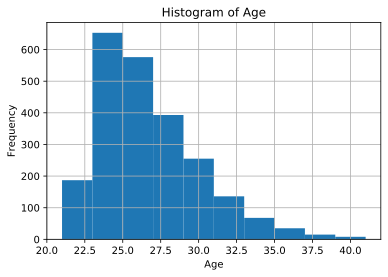

In [67]:
df_season_totals.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

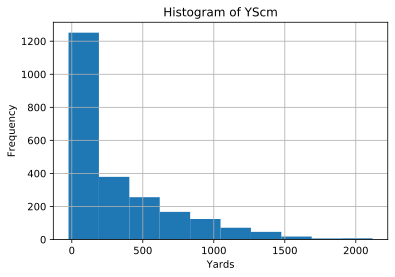

In [68]:
df_season_totals.YScm.hist()
plt.title('Histogram of YScm')
plt.xlabel('Yards')
plt.ylabel('Frequency')
plt.savefig('Yard from Scrimmage')


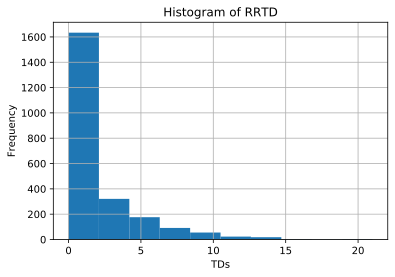

In [69]:
df_season_totals.RRTD.hist()
plt.title('Histogram of RRTD')
plt.xlabel('TDs')
plt.ylabel('Frequency')
plt.savefig('TDs')

In [70]:
pass

## MVP

### What what are the feature effects on #Touches that a player sees.

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [72]:
mask_probowlers = df_season_totals.pro_bowl == 1
mask_nonprobowlers = df_season_totals.pro_bowl == 0

In [73]:
df_probowlers = df_season_totals[mask_probowlers]
df_nonprobowlers = df_season_totals[mask_nonprobowlers]

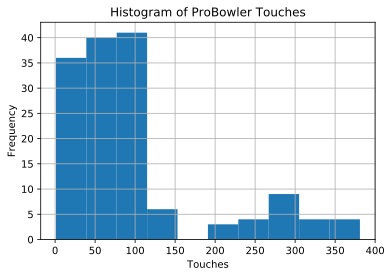

In [74]:
df_probowlers.Touch.hist()
plt.title('Histogram of ProBowler Touches')
plt.xlabel('Touches')
plt.ylabel('Frequency')
plt.savefig('PB_Touches')

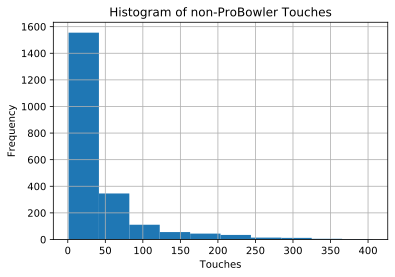

In [75]:
df_nonprobowlers.Touch.hist()
plt.title('Histogram of non-ProBowler Touches')
plt.xlabel('Touches')
plt.ylabel('Frequency')
plt.savefig('nPB_Touches')

In [76]:
#Average Touches of ProBowlers vs Non-ProBowlers
print(df_probowlers.Touch.mean(), df_nonprobowlers.Touch.mean())

98.73469387755102 38.867370353373104


In [77]:
covariates = ['RRTD', 'YScm', 'Fmb', 'Age', 'G']

In [78]:
pass


In [79]:
X, y = df_season_totals[covariates], df_season_totals['Touch']
print(X.shape, y.shape)

(2326, 5) (2326,)


In [80]:
# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=127)

In [81]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [82]:
# Create the model
model = sm.OLS(y_train, X_train)

# Fit the model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Touch   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              1762.
Date:                Fri, 19 Jul 2019   Prob (F-statistic):                        0.00
Time:                        08:59:57   Log-Likelihood:                         -9053.2
No. Observations:                1860   AIC:                                  1.812e+04
Df Residuals:                    1855   BIC:                                  1.814e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RRTD           0.7335      0.481      1.524      0.128      -0.210       1.677
YScm           0.1345      0.004     35.813      0.000       0.127       0.142
Fmb            3.7408      0.388      9.637      0.000       2.980       4.502
Age            0.1209      0.067      1.817      0.069      -0.010       0.251
G             -0.7641      0.163     -4.697      0.000      -1.083      -0.445
==============================================================================
Omnibus:                      277.595   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1210.232
Skew:                           0.651   Prob(JB):                    1.59e-263
Kurtosis:                       6.731   Cond. No.                         330.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

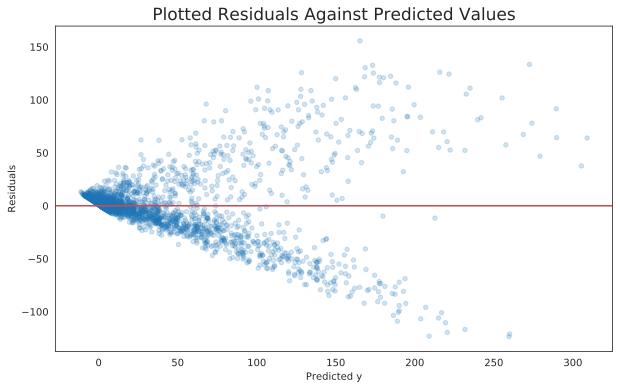

In [83]:
# Check for Heterosk
# Plot your predicted values on the x-axis, and your residuals on the y-axis

df_season_totals['predict']=fit.predict(X)
df_season_totals['resid']=y-df_season_totals.predict
with sns.axes_style('white'):
    plot=df_season_totals.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))
    plot.set(xlabel='Predicted y', ylabel="Residuals")
    plt.rcParams["axes.labelsize"] = 15
    sns.set(font_scale = 1.2)
    plot.axes.set_title('Plotted Residuals Against Predicted Values',fontsize=17)
    plt.axhline(0, color='r')


## Let's clean up the heteroskedasticity

In [84]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [85]:
# Create the model
model_log_y = sm.OLS(y_train_log, X_train)

# Fit the model to your training set
fit_log_y = model_log_y.fit()

# Print summary statistics of the model's performance
fit_log_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Touch   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              4319.
Date:                Fri, 19 Jul 2019   Prob (F-statistic):                        0.00
Time:                        08:59:57   Log-Likelihood:                         -2450.7
No. Observations:                1860   AIC:                                      4911.
Df Residuals:                    1855   BIC:                                      4939.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RRTD          -0.0144      0.014     -1.038      0.299      -0.041       0.013
YScm           0.0030      0.000     27.681      0.000       0.003       0.003
Fmb            0.1207      0.011     10.824      0.000       0.099       0.143
Age            0.0492      0.002     25.749      0.000       0.045       0.053
G              0.0410      0.005      8.763      0.000       0.032       0.050
==============================================================================
Omnibus:                       63.349   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.105
Skew:                          -0.467   Prob(JB):                     9.86e-16
Kurtosis:                       2.867   Cond. No.                         330.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
all_y_log = np.log(y)
print(X.shape, all_y_log.shape)

(2326, 5) (2326,)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


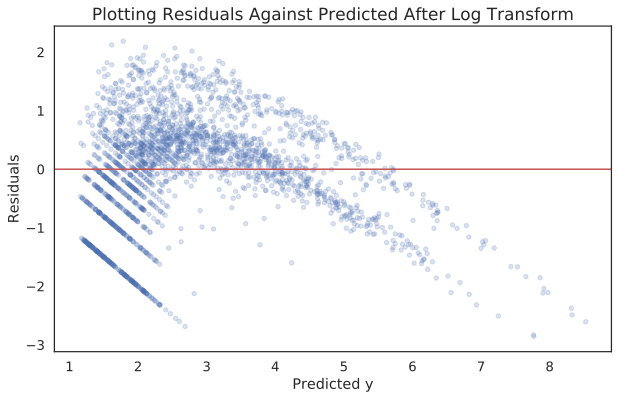

In [87]:
df_season_totals['predict_log_y'] = fit_log_y.predict(X)
df_season_totals['resid_log_y'] = all_y_log - df_season_totals.predict_log_y
with sns.axes_style('white'):
    plot = df_season_totals.plot(kind='scatter',
                  x='predict_log_y',y='resid_log_y',alpha=0.2,figsize=(10,6))
    plot.set(xlabel='Predicted y', ylabel="Residuals", title='Plotted Residuals Against Predicted Values')
    plt.rcParams["axes.labelsize"] = 15
    sns.set(font_scale = 1.2)
    plot.axes.set_title("Plotting Residuals Against Predicted After Log Transform",fontsize=17)
    plt.axhline(0, color='r')

In [88]:
df_season_totals.head()

Player    Pos  Touch  Y/Tch  YScm  RRTD  Fmb  pro_bowl  Age   G  \
0  LeGarrette Blount     RB    164    3.0   485     5    2         0   32  16   
1    Kerryon Johnson  RB/WR    150    5.7   854     4    1         0   21  10   
2        Zach Zenner     RB     62    5.2   321     3    0         0   27   8   
3       Theo Riddick     WR    101    5.5   555     0    0         0   27  14   
4   Matthew Stafford     QB     25    2.8    71     0    6         0   30  16   

   GS     predict      resid  predict_log_y  resid_log_y  
0   8   68.013680  95.986320       3.848396     1.251470  
1   7  116.417083  33.582917       4.056887     0.953748  
2   1   42.518804  19.481196       2.572123     1.555011  
3   3   67.202096  33.797904       3.559779     1.055342  
4  16   23.393661   1.606339       3.068226     0.150649

# Let's move on to Logit, and look at probowl




In [89]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

In [90]:
#get rid of the resids analysis from MVP
df_season_totals = df_season_totals.dropna(axis=1)
print(df_season_totals.shape)

(2326, 15)


In [91]:
df_season_totals.Pos.unique()

array(['RB', 'RB/WR', 'WR', 'QB', 'NO_POS_LISTED', 'FB', 'DB/S/SS', 'TE',
       'T', 'DT/LDT', 'P', 'TE/WR', 'CB', 'FS/SS', 'FB/RB/WR', 'RB/TE',
       'FB/RB/TE', 'FB/WR', 'DB', 'T/TE', 'DT/LDT/RDT', 'LCB/WR', 'DE',
       'C', 'FS', 'CB/RCB', 'K/WR', 'MLB', 'FB/RB', 'K', 'P/TE',
       'LDT/RDT', 'FB/TB/TE', 'FB/TE', 'RG', 'S', 'LT', 'RT', 'LB/RB',
       'NT', 'TB/TE', 'S/SS', 'DT', 'FB/TE/WR', 'RB/TE/WR', 'QB/WR', 'LG',
       'DE/NT', 'SS', 'RG/T'], dtype=object)

In [92]:
skill_mask = df_season_totals['Pos'].isin(['FB/TE/WR','TB/TE','RB', 'WR', 'FB/WR', 'TE', 'FB',
                                         'TE/WR', 'CB/RCB', 'LCB/WR', 'FB/RB/WR', 'RB/WR', 'FB/RB/TE', 
                                           'RB/TE', 'T/TE', 'FB/RB'])
skill_mask.value_counts()

True     1422
False     904
Name: Pos, dtype: int64

In [93]:
df_season_totals_skill = df_season_totals[skill_mask]
df_season_totals_skill.head()

Player    Pos  Touch  Y/Tch  YScm  RRTD  Fmb  pro_bowl  Age   G  \
0  LeGarrette Blount     RB    164    3.0   485     5    2         0   32  16   
1    Kerryon Johnson  RB/WR    150    5.7   854     4    1         0   21  10   
2        Zach Zenner     RB     62    5.2   321     3    0         0   27   8   
3       Theo Riddick     WR    101    5.5   555     0    0         0   27  14   
5        Golden Tate     WR     47   11.9   559     3    1         0   30   7   

   GS     predict      resid  predict_log_y  resid_log_y  
0   8   68.013680  95.986320       3.848396     1.251470  
1   7  116.417083  33.582917       4.056887     0.953748  
2   1   42.518804  19.481196       2.572123     1.555011  
3   3   67.202096  33.797904       3.559779     1.055342  
5   4   79.392270 -32.392270       3.510310     0.339837

In [94]:
logit_covariates = ['RRTD', 'YScm', 'Fmb', 'Age', 'G', 'Touch']


In [95]:
X_logit, y_logit = df_season_totals[logit_covariates], df_season_totals.pro_bowl
print(X_logit.shape, y_logit.shape)




(2326, 6) (2326,)


In [96]:
#Test train split
X, X_logit_test, y, y_logit_test = train_test_split(X_logit, y_logit, test_size=.2, random_state=17)


In [97]:
X_logit_train, X_logit_val, y_logit_train, y_logit_val = train_test_split(X, y, test_size=.25, random_state=27)

In [98]:
#Sanity Check to make sure it split 60%
X_logit_train.shape[0]/X_logit.shape[0]



0.5997420464316423

In [99]:
#scale the Xs
scaler = StandardScaler()

X_logit_train_scaled = scaler.fit_transform(X_logit_train.values)
X_logit_val_scaled = scaler.fit_transform(X_logit_train.values)
X_logit_test_scaled = scaler.transform(X_logit_test.values)

In [100]:
# train accuracy
log_reg_tvt_split = LogisticRegression(C=1e9, solver='lbfgs')
log_reg_tvt_split.fit(X_logit_train, y_logit_train)




/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
y_logit_train_preds = log_reg_tvt_split.predict(X_logit_train)


In [102]:
metrics.accuracy_score(y_logit_train, y_logit_train_preds)


0.9297491039426523

In [103]:
print(metrics.classification_report(y_logit_train, y_logit_train_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1298
           1       0.48      0.11      0.18        97

    accuracy                           0.93      1395
   macro avg       0.71      0.55      0.57      1395
weighted avg       0.91      0.93      0.91      1395



In [104]:
import statsmodels.api as sm
logit_model=sm.Logit(y_logit_train,X_logit_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.220422
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: pro_bowl         AIC:              626.9765  
Date:               2019-07-19 08:59 BIC:              658.4204  
No. Observations:   1395             Log-Likelihood:   -307.49   
Df Model:           5                LL-Null:          -352.14   
Df Residuals:       1389             LLR p-value:      9.3864e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
RRTD      0.1090     0.0493     2.2120   0.0270    0.0124    0.2056
YScm      0.0020     0.0005     3.9097   0.0001    0.0010 

## Looks like we have class imbalance...

### Let's weight the response variable

In [105]:
from sklearn import linear_model, svm, metrics, ensemble


In [106]:
def print_metrics(model,X_set,y_set):
  
    y_logit_pred = model.predict(X_set)

    print(metrics.classification_report(y_set, y_logit_pred))
    

### Regular logit model with very low regularization (on validation set)

In [107]:
X_logit_train.shape

(1395, 6)

In [108]:
logreg_weights = linear_model.LogisticRegression(C=1e9)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       443
           1       0.38      0.14      0.20        22

    accuracy                           0.95       465
   macro avg       0.67      0.56      0.59       465
weighted avg       0.93      0.95      0.94       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Logit with balance class weights

In [109]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e9)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)


              precision    recall  f1-score   support

           0       0.99      0.79      0.88       443
           1       0.16      0.82      0.27        22

    accuracy                           0.79       465
   macro avg       0.57      0.80      0.57       465
weighted avg       0.95      0.79      0.85       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e5)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       443
           1       0.16      0.82      0.27        22

    accuracy                           0.79       465
   macro avg       0.57      0.80      0.57       465
weighted avg       0.95      0.79      0.85       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=17)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       443
           1       0.16      0.82      0.26        22

    accuracy                           0.78       465
   macro avg       0.57      0.80      0.57       465
weighted avg       0.95      0.78      0.84       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=1e-3)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)


              precision    recall  f1-score   support

           0       0.98      0.72      0.83       443
           1       0.12      0.77      0.21        22

    accuracy                           0.73       465
   macro avg       0.55      0.75      0.52       465
weighted avg       0.94      0.73      0.81       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
class_w = {0:1, 1:9}
logreg_weights = linear_model.LogisticRegression(class_weight=class_w, C=17)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_val, y_logit_val)

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       443
           1       0.18      0.77      0.30        22

    accuracy                           0.83       465
   macro avg       0.58      0.80      0.60       465
weighted avg       0.95      0.83      0.87       465



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Looks like we get the best f1-scores for regularization set between ~15 to 1e5

In [114]:
val_logit_model=sm.Logit(y_logit_train,X_logit_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.220422
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.127     
Dependent Variable: pro_bowl         AIC:              626.9765  
Date:               2019-07-19 08:59 BIC:              658.4204  
No. Observations:   1395             Log-Likelihood:   -307.49   
Df Model:           5                LL-Null:          -352.14   
Df Residuals:       1389             LLR p-value:      9.3864e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
RRTD      0.1090     0.0493     2.2120   0.0270    0.0124    0.2056
YScm      0.0020     0.0005     3.9097   0.0001    0.0010 

## Time to YOLO the test set!!! 

In [115]:
class_w = {0:1, 1:9}

logreg_weights = linear_model.LogisticRegression(class_weight=class_w, C=17)

logreg_weights.fit(X_logit_train, y_logit_train)

print_metrics(logreg_weights,X_logit_test, y_logit_test)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       438
           1       0.29      0.82      0.43        28

    accuracy                           0.87       466
   macro avg       0.64      0.85      0.68       466
weighted avg       0.95      0.87      0.90       466



/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
logreg_weights = linear_model.LogisticRegression(class_weight="balanced", C=17)

logreg_weights_final = logreg_weights.fit(X_logit_train, y_logit_train)

/Users/alexlou/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


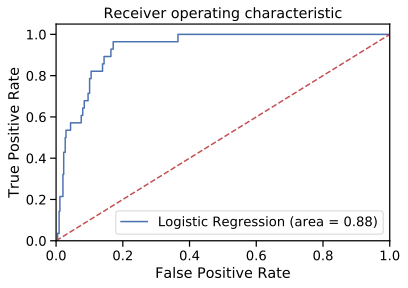

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_logit_test, logreg_weights_final.predict(X_logit_test))
fpr, tpr, thresholds = roc_curve(y_logit_test, logreg_weights_final.predict_proba(X_logit_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()